<a href="https://colab.research.google.com/github/ParastooHam/Jump-Start-RL/blob/main/JSRL_different_Guide_Policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import time
from IPython.display import clear_output
import progressbar


In [ ]:
start = np.array([0,1,1,0.0,0.0]) 
state_space_size = 20
action_space_size = 15
q_table = np.zeros((state_space_size,action_space_size))
num_episodes = 100
max_steps_per_episode = 1000 
learning_rate = 0.01
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 1/num_episodes
exploration_decay_rate = 0.1 #(max_exploration_rate - min_exploration_rate)/num_episodes
rewards_all_episodes = [] 
cost_all_1= []
state_all=[]
major_count_all_1=[]
no_count_all_1=[]
Count_step=np.array([])
CUMULATIVE_ERROR_vector_RL=[]

**Simple RL to create a policy**

In [ ]:
from FooEnv import FooEnv
env = FooEnv(start)

for episode in range(num_episodes): 
  state = env.reset()
  state = env.observe()
  exploration_rate = exploration_rate - (exploration_decay_rate*max_exploration_rate)
  if exploration_rate < min_exploration_rate:
    exploration_rate = min_exploration_rate
  CUMULATIVE_ERROR = 0  
  rewards_current_episode = 0
  CUMULATIVE_ERROR_ = 0
  for step in range(max_steps_per_episode): 
    exploration_rate_threshold = random.uniform(0,1)
    
    if exploration_rate_threshold > exploration_rate:
      if np.shape(state) == (1,5):
        state=np.squeeze(state, axis=(0,))
      #print('state', np.shape(state))
      action = np.argmax(q_table[int(state[0]),:])
    else:
      action = np.random.randint(0, action_space_size)
    #print('action', action)

    new_state, X_user, Y_user, x_TDoA, y_TDoA, reward, error = env.update_probability_matrix(action)

    state = [new_state[0], X_user, Y_user, x_TDoA, y_TDoA]
    #print('state', state)


    #print('error', error)
    #print(q_table)
    #print('error', error)
    q_table[int(state[0]), action] = q_table[int(state[0]), action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[int(new_state[0]), :]))
    #state[0][0] = new_state[0]
    rewards_current_episode += reward
    CUMULATIVE_ERROR += error
    state_all = np.append(state_all, state)
  CUMULATIVE_ERROR_ = CUMULATIVE_ERROR/ max_steps_per_episode
  print("mean error {}".format(CUMULATIVE_ERROR_))
  print("Reward {}".format(rewards_current_episode))
  print("episode {} ".format(episode))
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
  rewards_all_episodes.append(rewards_current_episode)
  Count_step = np.append(Count_step, step)
  CUMULATIVE_ERROR_vector_RL=np.append(CUMULATIVE_ERROR_vector_RL, CUMULATIVE_ERROR_)



mean error 0.5310099253889471
Reward 4882.391589165702
episode 0 
mean error 0.5161933614992043
Reward 5263.254705000625
episode 1 
mean error 0.46476107757031615
Reward 6054.441214100273
episode 2 
mean error 0.43139865922068127
Reward 6408.317356830646
episode 3 
mean error 0.3978424711068456
Reward 6846.083554734701
episode 4 
mean error 0.379838140156595
Reward 7144.211721977728
episode 5 
mean error 0.3149149729322459
Reward 8162.937153101373
episode 6 
mean error 0.2727482253731552
Reward 8728.774037834313
episode 7 
mean error 0.27769028620257746
Reward 8751.270897799168
episode 8 
mean error 0.2400481621750879
Reward 9267.638643297416
episode 9 
mean error 0.23097661453408333
Reward 9332.959860016374
episode 10 
mean error 0.2263577961051672
Reward 9419.65002674107
episode 11 
mean error 0.2144356910386842
Reward 9511.603239647387
episode 12 
mean error 0.17839594429753847
Reward 10171.4891818485
episode 13 
mean error 0.17124198656139356
Reward 10266.859910116824
episode 14 
m

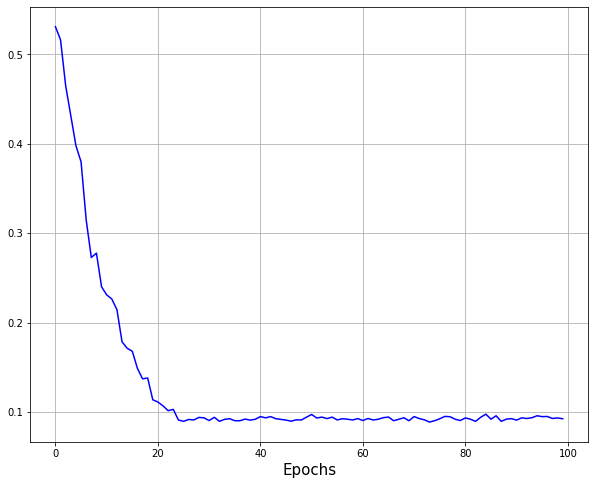

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
#plt.xlim(0,300)
plt.xlabel('Epochs', fontsize = 15) 
#plt.ylabel("Number of Pair Energy-Optimzed LoS Links", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(CUMULATIVE_ERROR_vector, color='blue')

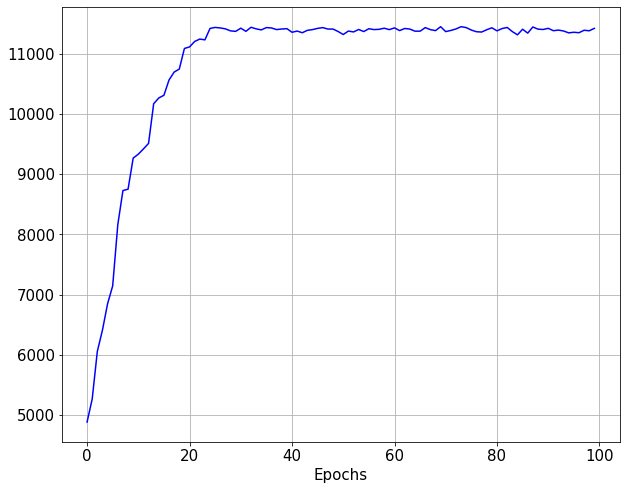

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
#plt.xlim(0,300)
plt.xlabel('Epochs', fontsize = 15) 
#plt.ylabel("Number of Pair Energy-Optimzed LoS Links", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(rewards_all_episodes, color='blue')

JSRL

In [ ]:
q_table_policy = q_table

In [ ]:
q_table_policy = np.zeros((state_space_size,action_space_size))
q_table_policy
for i in range(state_space_size):
  q_table_policy[i, :] = np.random.choice([0, 1], size=(15,), p=[1./3, 2./3])
q_table_policy

array([[1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0.

In [ ]:
q_table_policy = np.zeros((state_space_size,action_space_size))
Location_x=[1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3. ,4. ,5., 1. ,2. ,3. ,4., 5.]
Location_y=[1., 1., 1., 1., 1., 2., 2., 2., 2. ,2., 3., 3., 3., 3., 3. ,4., 4. ,4. ,4. ,4.]
Estimated_X=np.array([[0.92080541, 2.55754959, 3.56294827 ,4.07047654 ,5.00962982, 1.65446637,
  2.07025804, 3.05300205, 3.98863413, 5.05334402, 1.05118333 ,2.04094691,
  2.98149286, 3.99737396, 4.9685466 , 1.50202041, 1.92154936 ,2.90599674,
  4.56070214, 5.07062182],
 [1.09708685, 2.05815177, 3.08957037, 3.96645196 ,5.57563608 ,0.96997458,
  2.03541889, 3.00514886, 3.99470451, 4.98496912 ,1.00914971 ,2.09534544,
  2.99564709, 3.9063779 , 5.07998394 ,1.55941232 ,2.54070627 ,3.07795924,
  4.68506958, 5.54476713],
 [1.0325879,  2.02193754, 2.96879542 ,4.55309572 ,4.91216912 ,0.91828615,
  2.02617768, 3.04915626, 4.0356432  ,5.07245377 ,1.66833102 ,1.99146224,
  3.66742883, 3.99386528, 5.62809449 ,1.53153867 ,1.91185714 ,3.09035082,
  4.6656977 , 5.07192082],
 [0.91949879, 2.54882026, 3.66047603 ,4.037698   ,5.65482684 ,1.54920134,
  1.93525375, 3.06355733, 3.95559099 ,4.90880007 ,1.04024206 ,1.91554526,
  2.98315159, 3.97314847, 5.03641783 ,0.97945639 ,2.62549418 ,3.02361615,
  4.0692074 , 5.66156247],
 [0.95969421, 2.55899698 ,3.55049233 ,4.60349968 ,4.98779363 ,1.51728505,
  1.90229386, 2.9727452  ,3.93914966 ,4.93320296 ,1.6984551  ,1.96176413,
  3.68051603, 4.06048688 ,5.61056123 ,0.92125847 ,1.93380127, 3.09536301,
  4.06584216, 5.00421865],
 [1.03288124, 1.91363891 ,3.04480708 ,4.69596464 ,5.63734562, 1.06108746,
  2.00404888, 2.92757342 ,3.91356294 ,5.01994415 ,1.57027948, 2.09736409,
  3.50744688, 4.07779934 ,5.55156735 ,0.9661141  ,2.64711816, 3.03697926,
  3.97046613, 5.54385183],
 [1.56762373, 2.62669129 ,3.53642371 ,4.6073438  ,5.58105906, 1.63137473,
  2.5381262 , 3.68714845 ,4.59485889 ,5.58220504 ,1.52158017, 2.66070249,
  3.5809828 ,4.55600481 ,5.58472249 ,1.68857016 ,2.5506759  ,3.67497152,
  4.5420725 ,5.55016827],
 [1.69756287, 2.53918668 ,3.60139345, 4.69891938, 5.64610971 ,1.64297586,
  2.57001274, 3.68249036 ,4.63195167, 5.64557942, 1.63058557 ,2.51351396,
  3.53735858, 4.53894799 ,5.50705718, 1.57982416, 2.55888435 ,3.63484914,
  4.69761851, 5.51510638],
 [1.60563002 ,2.59413551 ,3.56868959, 4.69386383, 5.69944082 ,1.50284214,
  2.64010485 ,3.60681349 ,4.5312094 , 5.64446638, 1.62505776 ,2.6947105,
  3.62267718 ,4.69140506 ,5.58482775, 1.5673007 , 2.65378873 ,3.64698126,
  4.5115605  ,5.69415851],
 [1.67199969 ,2.59267155 ,3.64050564, 4.65241042 ,5.63778497 ,1.50595006,
  2.61703816 ,3.68535003 ,4.67204252, 5.55677651, 1.65867873 ,2.64433564,
  3.52336424 ,4.55157474 ,5.51896494, 1.62351108 ,2.54443873 ,3.51950128,
  4.65074027 ,5.60584615],
 [1.61465658 ,2.52076255 ,3.60499327, 4.69620109, 5.60714403, 1.67833023,
  2.52183374 ,3.57897135 ,4.68315125, 5.5094821 , 1.5943032 , 2.54906826,
  3.62628155 ,4.52110844 ,5.50474339, 1.6472469  ,2.66638538, 3.54762158,
  4.69101003 ,5.63474952],
 [1.54281186 ,2.57366163 ,3.5829898 , 4.63869111 ,5.59287416, 1.60075937,
  2.52747947 ,3.59193679 ,4.60264284, 5.61681979 ,1.63278453 ,2.54057788,
  3.66100315 ,4.59357521 ,5.6065336 , 1.50538013 ,2.57004622 ,3.65464905,
  4.57404955 ,5.62301965],
 [1.51838629 ,2.5215201  ,3.68219279, 4.68591323 ,5.60382395 ,1.51728515,
  2.67941189 ,3.67675295 ,4.69529085 ,5.60625304 ,1.58211288 ,2.59173132,
  3.63465583 ,4.68921231 ,5.51680791 ,1.51566629 ,2.64343066, 3.55664228,
  4.58244994 ,5.57948175],
 [1.53645747 ,2.62735613 ,3.61559714 ,4.55158134 ,5.5611486 , 1.64384812,
  2.50619929 ,3.607262   ,4.60328068 ,5.55352035 ,1.536486  , 2.52429331,
  3.68818824 ,4.64461531 ,5.5227823  ,1.53043962 ,2.50354565, 3.59635796,
  4.64267496 ,5.64427136],
 [1.59050097 ,2.61351949 ,3.52239791 ,4.5932257  ,5.51903258, 1.62643465,
  2.51415181 ,3.51696723 ,4.51414896 ,5.59674339 ,1.51211995, 2.62594651,
  3.52235431 ,4.59645576 ,5.56973571 ,1.64301636 ,2.64045248 ,3.5936768,
  4.66255906 ,5.61996777]])
 
Estimated_Y=np.array([[1.03630853, 2.51002169, 3.64894452, 3.97638663, 4.96712718, 1.69926278,
  1.92575434, 3.09915982, 3.93536153, 5.03651031, 0.9778915,  2.0404359,
  3.04557182, 4.06641713, 5.03874291, 1.52412276, 2.04873835, 3.05241862,
  4.65901292, 4.98812948],
 [1.0164724 , 2.06564506, 2.91487363, 4.07590026, 5.6760829 , 1.03492649,
  1.98476654, 2.98401699, 4.04856392 ,4.94171256, 0.9287776 , 1.9570996,
  2.95882028, 3.96522173, 4.90170973 ,1.64162737, 2.62584203, 2.96339691,
  4.50499882, 5.62120272],
 [1.08819662, 1.91239203, 2.93700525, 4.5849988 , 5.07286969, 0.9420722,
  2.05261362, 2.96230495, 3.98366372, 4.91882545 ,1.55787959 ,2.09604699,
  3.59027442, 4.00356951, 5.5546938 , 1.67662313 ,2.02322099 ,3.06832299,
  4.58040401, 5.0496606 ],
 [1.05406808, 2.56479891, 3.64708268, 4.00371784, 5.62893737 ,1.56712843,
  1.95298572, 2.98241585, 3.93542388 ,5.02185185, 1.06328221 ,1.95116496,
  2.97005028, 3.92320348, 4.98070309 ,1.04274958, 2.64731961 ,2.90726667,
  4.09689165, 5.56523765],
 [1.04711205, 2.62884308, 3.68301676 ,4.54979845, 4.91205032 ,1.65605551,
  2.02165901, 2.95642321, 4.0500723  ,4.93966417, 1.68963638, 1.92691104,
  3.55858478, 3.96163593, 5.53388328 ,0.92486325, 1.93497513, 3.07880949,
  3.95825647, 5.08223561],
 [0.95715887 ,2.09704178, 3.06933079 ,4.55842772, 5.6950331 , 0.9994557,
  2.01555829 ,2.97477636, 4.06344478 ,5.03753742, 1.55646742, 2.03041993,
  3.50237814 ,3.99232345, 5.5003393  ,1.03462789, 2.651246  , 3.0076513,
  4.01253236 ,5.64649673],
 [1.69707443 ,2.51720389, 3.50227879 ,4.54785405, 5.5548463  ,1.67123872,
  2.56359405 ,3.6616354 , 4.58443905 ,5.68245055, 1.66371276 ,2.6829684,
  3.53789517 ,4.69994981, 5.63170759 ,1.65282023, 2.6274885  ,3.51089115,
  4.58710599 ,5.66269459],
 [1.62327472 ,2.57849108 ,3.51059132 ,4.61920931, 5.67549252 ,1.5895234,
  2.55650653 ,3.65517881 ,4.65114071 ,5.69907616, 1.57008069 ,2.56071961,
  3.5432516  ,4.54916991 ,5.63212434 ,1.68775867, 2.54991796 ,3.52243597,
  4.5214387  ,5.65025492],
 [1.6064133  ,2.57487366 ,3.51330676 ,4.66069161, 5.5803262  ,1.69519709,
  2.52369182 ,3.52804874 ,4.60306763 ,5.53058359, 1.58110295 ,2.64217091,
  3.52285577 ,4.52056367 ,5.5679059  ,1.63648618, 2.67470092 ,3.61184735,
  4.68198142 ,5.54712948],
 [1.61614274 ,2.66302243 ,3.57280696 ,4.50094085, 5.62536303 ,1.54138579,
  2.64952813 ,3.67799898 ,4.56691796 ,5.52776882 ,1.62737157 ,2.59431276,
  3.57542807 ,4.56978924 ,5.58659716 ,1.51909195 ,2.66237506 ,3.69465319,
  4.65106088 ,5.63945758],
 [1.61565245 ,2.67332796 ,3.53452901 ,4.67418962 ,5.5210401  ,1.58515637,
  2.57047678 ,3.58705003 ,4.50758706 ,5.51842943 ,1.57064534 ,2.5816591,
  3.68990322 ,4.58273189 ,5.6914232  ,1.66611255 ,2.59252683 ,3.51796603,
  4.65692457 ,5.65357307],
 [1.69445898 ,2.55631056 ,3.51404773 ,4.64010099 ,5.64575727 ,1.53868939,
  2.63279886 ,3.65685226 ,4.50734271 ,5.5683367  ,1.51801038 ,2.59113624,
  3.53298505 ,4.53623249 ,5.67609518 ,1.58033495 ,2.53961357 ,3.53588908,
  4.57929043 ,5.66161244],
 [1.63253541 ,2.52125631 ,3.63868933 ,4.6743494  ,5.68496492 ,1.52390094,
  2.68642956 ,3.64449414 ,4.56233691 ,5.54028906 ,1.57221816 ,2.61203436,
  3.62568964 ,4.51061783 ,5.56929154 ,1.5016593  ,2.53371078 ,3.51227652,
  4.67179331 ,5.67727842],
 [1.54586084 ,2.58330234 ,3.57346725 ,4.55632357 ,5.66579401 ,1.61757923,
  2.600912   ,3.51053535 ,4.69180151 ,5.59884818 ,1.61604897 ,2.6882454,
  3.64561628 ,4.55761112 ,5.51092354 ,1.65961529 ,2.67993676 ,3.56460949,
  4.50820555 ,5.51468411],
 [1.62898364 ,2.55098459 ,3.57836593 ,4.59160504 ,5.66187188 ,1.5944394,
  2.64751124 ,3.58895802 ,4.67234471 ,5.60358616 ,1.66182106 ,2.5577502,
  3.50004443 ,4.64439264 ,5.56091772 ,1.57338662 ,2.51059339 ,3.68070372,
  4.62898996 ,5.55399155]])


for i in range(state_space_size):
  for j in range(action_space_size):
    q_table_policy[i][j] = 1/(np.sqrt((Location_x[i]- Estimated_X[j][i])**2 +(Location_y[i]- Estimated_Y[j][i])**2))

In [ ]:
q_table_policy

array([[11.47827082, 10.1549293 , 10.63552079, 10.31212716, 16.12881835,
        18.51680927,  1.11241005,  1.06900506,  1.16680093,  1.09683978,
         1.14947795,  1.13452067,  1.22276676,  1.30660285,  1.15910437],
       [ 0.6212466 ,  0.93700467,  1.09570342,  0.60304469,  0.58068843,
         0.9087309 ,  0.60918451,  0.59950612,  0.59409998,  0.56641969,
         0.57061677,  0.60289223,  0.62182562,  0.5871775 ,  0.5995489 ],
       [ 0.36926228,  0.52165729,  0.51619388,  0.36653712,  0.36510892,
         0.48313477,  0.3907577 ,  0.38735423,  0.38807179,  0.37716833,
         0.3837689 ,  0.38748302,  0.36691212,  0.37791876,  0.38011905],
       [ 0.33588371,  0.32508874,  0.2756785 ,  0.33289453,  0.2777212 ,
         0.27579754,  0.27781921,  0.27129112,  0.26839366,  0.28080333,
         0.2674106 ,  0.27058411,  0.26753541,  0.27786699,  0.27470513],
       [ 0.25207083,  0.212252  ,  0.24547006,  0.2139026 ,  0.25561919,
         0.21105528,  0.21778145,  0.21186779, 

In [ ]:
max_step = 0.9 * max_steps_per_episode
step_threshold = max_step
min_step = 0
exploration_rate = 1
exploration_decay_step = (max_step-min_step)/num_episodes
rewards_all_episodes_ = [] 
CUMULATIVE_ERROR_vector = []
q_table = np.zeros((state_space_size,action_space_size))
from FooEnv import FooEnv
env = FooEnv(start)

for episode in range(num_episodes): 
  state = env.reset()
  state = env.observe()
  #print('state', state)
  CUMULATIVE_ERROR = 0
  CUMULATIVE_ERROR_ = 0
  rewards_current_episode = 0
  exploration_rate = exploration_rate - 0.02
  if exploration_rate < min_exploration_rate:
    exploration_rate = min_exploration_rate
    
  step_threshold = step_threshold-15 #(exploration_decay_step *max_step)
  if step_threshold < min_step:
    step_threshold = min_step
  print('exploration', exploration_rate)
  print('step_threshold', step_threshold)
  for step in range(max_steps_per_episode): 
    exploration_rate_threshold = random.uniform(0,1)

    
    if step < step_threshold:
      if np.shape(state) == (1,5):
        state=np.squeeze(state, axis=(0,))
      action = np.argmax(q_table_policy[int(state[0]),:])
    else:  
      if exploration_rate_threshold > exploration_rate:
        if np.shape(state) == (1,5):
          state=np.squeeze(state, axis=(0,))
      #print('state', np.shape(state))
        action = np.argmax(q_table[int(state[0]),:])
      else:
        action = np.random.randint(0, action_space_size)
    #print('action', action)

    new_state, X_user, Y_user, x_TDoA, y_TDoA, reward, error = env.update_probability_matrix(action)

    state = [new_state[0], X_user, Y_user, x_TDoA, y_TDoA]
    #print('state', state)


    #print('error', error)
    #print(q_table)
    #print('reward', reward)
    q_table[int(state[0]), action] = q_table[int(state[0]), action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[int(new_state[0]), :]))
    #state[0][0] = new_state[0]
    rewards_current_episode += reward
    CUMULATIVE_ERROR += error
    state_all = np.append(state_all, state)
  CUMULATIVE_ERROR_ = CUMULATIVE_ERROR/ max_steps_per_episode
  print("mean error {}".format(CUMULATIVE_ERROR_))
  print("Reward {}".format(rewards_current_episode))
  print("episode {} ".format(episode))
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
  rewards_all_episodes_.append(rewards_current_episode)
  Count_step = np.append(Count_step, step)
  CUMULATIVE_ERROR_vector=np.append(CUMULATIVE_ERROR_vector, CUMULATIVE_ERROR_)



exploration 0.98
step_threshold 885.0
mean error 0.14273956596088885
Reward 10368.925657030064
episode 0 
exploration 0.98
step_threshold 870.0
mean error 0.15298254872425762
Reward 10237.58243485439
episode 1 
exploration 0.8857890438555999
step_threshold 855.0
mean error 0.15319248821081083
Reward 10262.249508718367
episode 2 
exploration 0.800543445547202
step_threshold 840.0
mean error 0.14890576451318338
Reward 10391.171999414964
episode 3 
exploration 0.7234100384749007
step_threshold 825.0
mean error 0.1591492666025912
Reward 10165.408249099972
episode 4 
exploration 0.6536168455752829
step_threshold 810.0
mean error 0.1441112269473946
Reward 10417.204899063594
episode 5 
exploration 0.5904653531155071
step_threshold 795.0
mean error 0.14142349771642607
Reward 10448.397759448899
episode 6 
exploration 0.5333235197330861
step_threshold 780.0
mean error 0.14308955588805702
Reward 10441.073851967045
episode 7 
exploration 0.4816194507534953
step_threshold 765.0
mean error 0.1395378

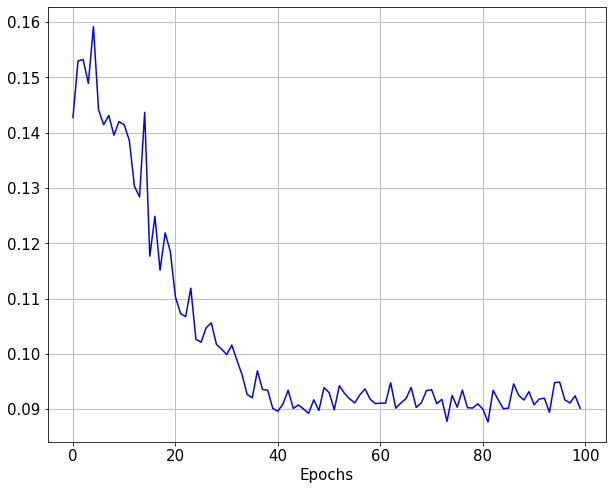

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
#plt.xlim(0,300)
plt.xlabel('Epochs', fontsize = 15) 
#plt.ylabel("Number of Pair Energy-Optimzed LoS Links", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(CUMULATIVE_ERROR_vector, color='blue')

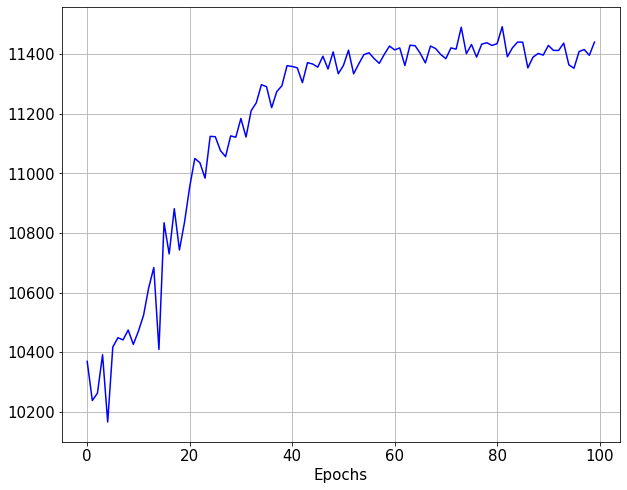

In [ ]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
#plt.xlim(0,300)
plt.xlabel('Epochs', fontsize = 15) 
#plt.ylabel("Number of Pair Energy-Optimzed LoS Links", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(rewards_all_episodes_, color='blue')

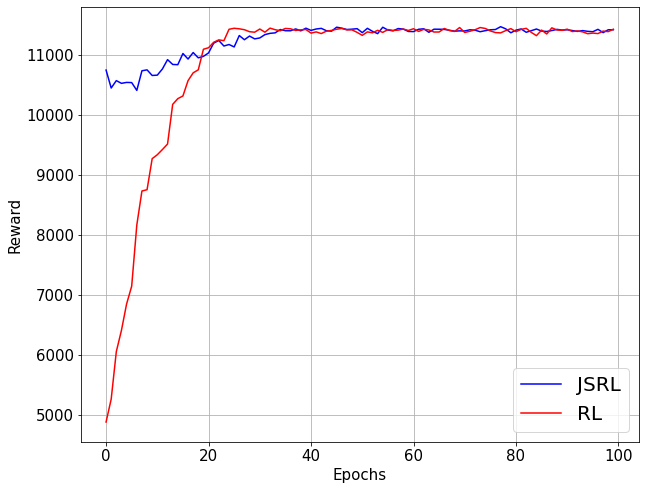

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
#plt.xlim(0,300)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Reward", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(rewards_all_episodes_, color='blue', label = 'JSRL')
plt.plot(rewards_all_episodes, color='red', label ='RL')
plt.legend(fontsize=20,loc = 'lower right')
plt.rc('legend',fontsize=10) # using a size in points
plt.rc('legend',fontsize='medium') # using a named size


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
#plt.xlim(0,300)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Reward", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(CUMULATIVE_ERROR_vector, color='blue', label = 'JSRL')
plt.plot(CUMULATIVE_ERROR_vector, color='red', label ='RL')
plt.legend(fontsize=20,loc = 'lower right')
plt.rc('legend',fontsize=10) # using a size in points
plt.rc('legend',fontsize='medium') # using a named size